# Importing the Libraries and Dataset

In [1]:
#Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and read the dataset
df = pd.read_csv('Jobs.csv')

In [3]:
#Display the top 5 rows
df.head(5)

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [4]:
#Display the number of rows and columns
df.shape

(790, 5)

In [5]:
#Display the summary of the dataset
df.info

<bound method DataFrame.info of      Unnamed: 0                                       title  \
0             0  Senior Analyst, Data Science and Analytics   
1             1                       Senior Data Scientist   
2             2                   Lead Data Science Analyst   
3             3                         Data Science Intern   
4             4                              Data Scientist   
..          ...                                         ...   
785         785                Research and Data Specialist   
786         786           Quality Assurance Data Specialist   
787         787                         Senior Data Analyst   
788         788                Cost Controller/Data Analyst   
789         789                             Data Specialist   

                               company    announcement  \
0                           TransUnion        The Muse   
1               Grubhub Holdings, Inc.    ZipRecruiter   
2          Discover Financial Service

# Exploratory Data Analysis

**Countplot of Job Titles and Announcements**

To better understand the distribution of different job titles in our dataset, we will create a countplot. This visualization will help us identify the frequency of each job title, giving us a clearer picture of the job market landscape. By examining the countplot, we can see which job titles are most common and potentially identify trends or patterns in the data.

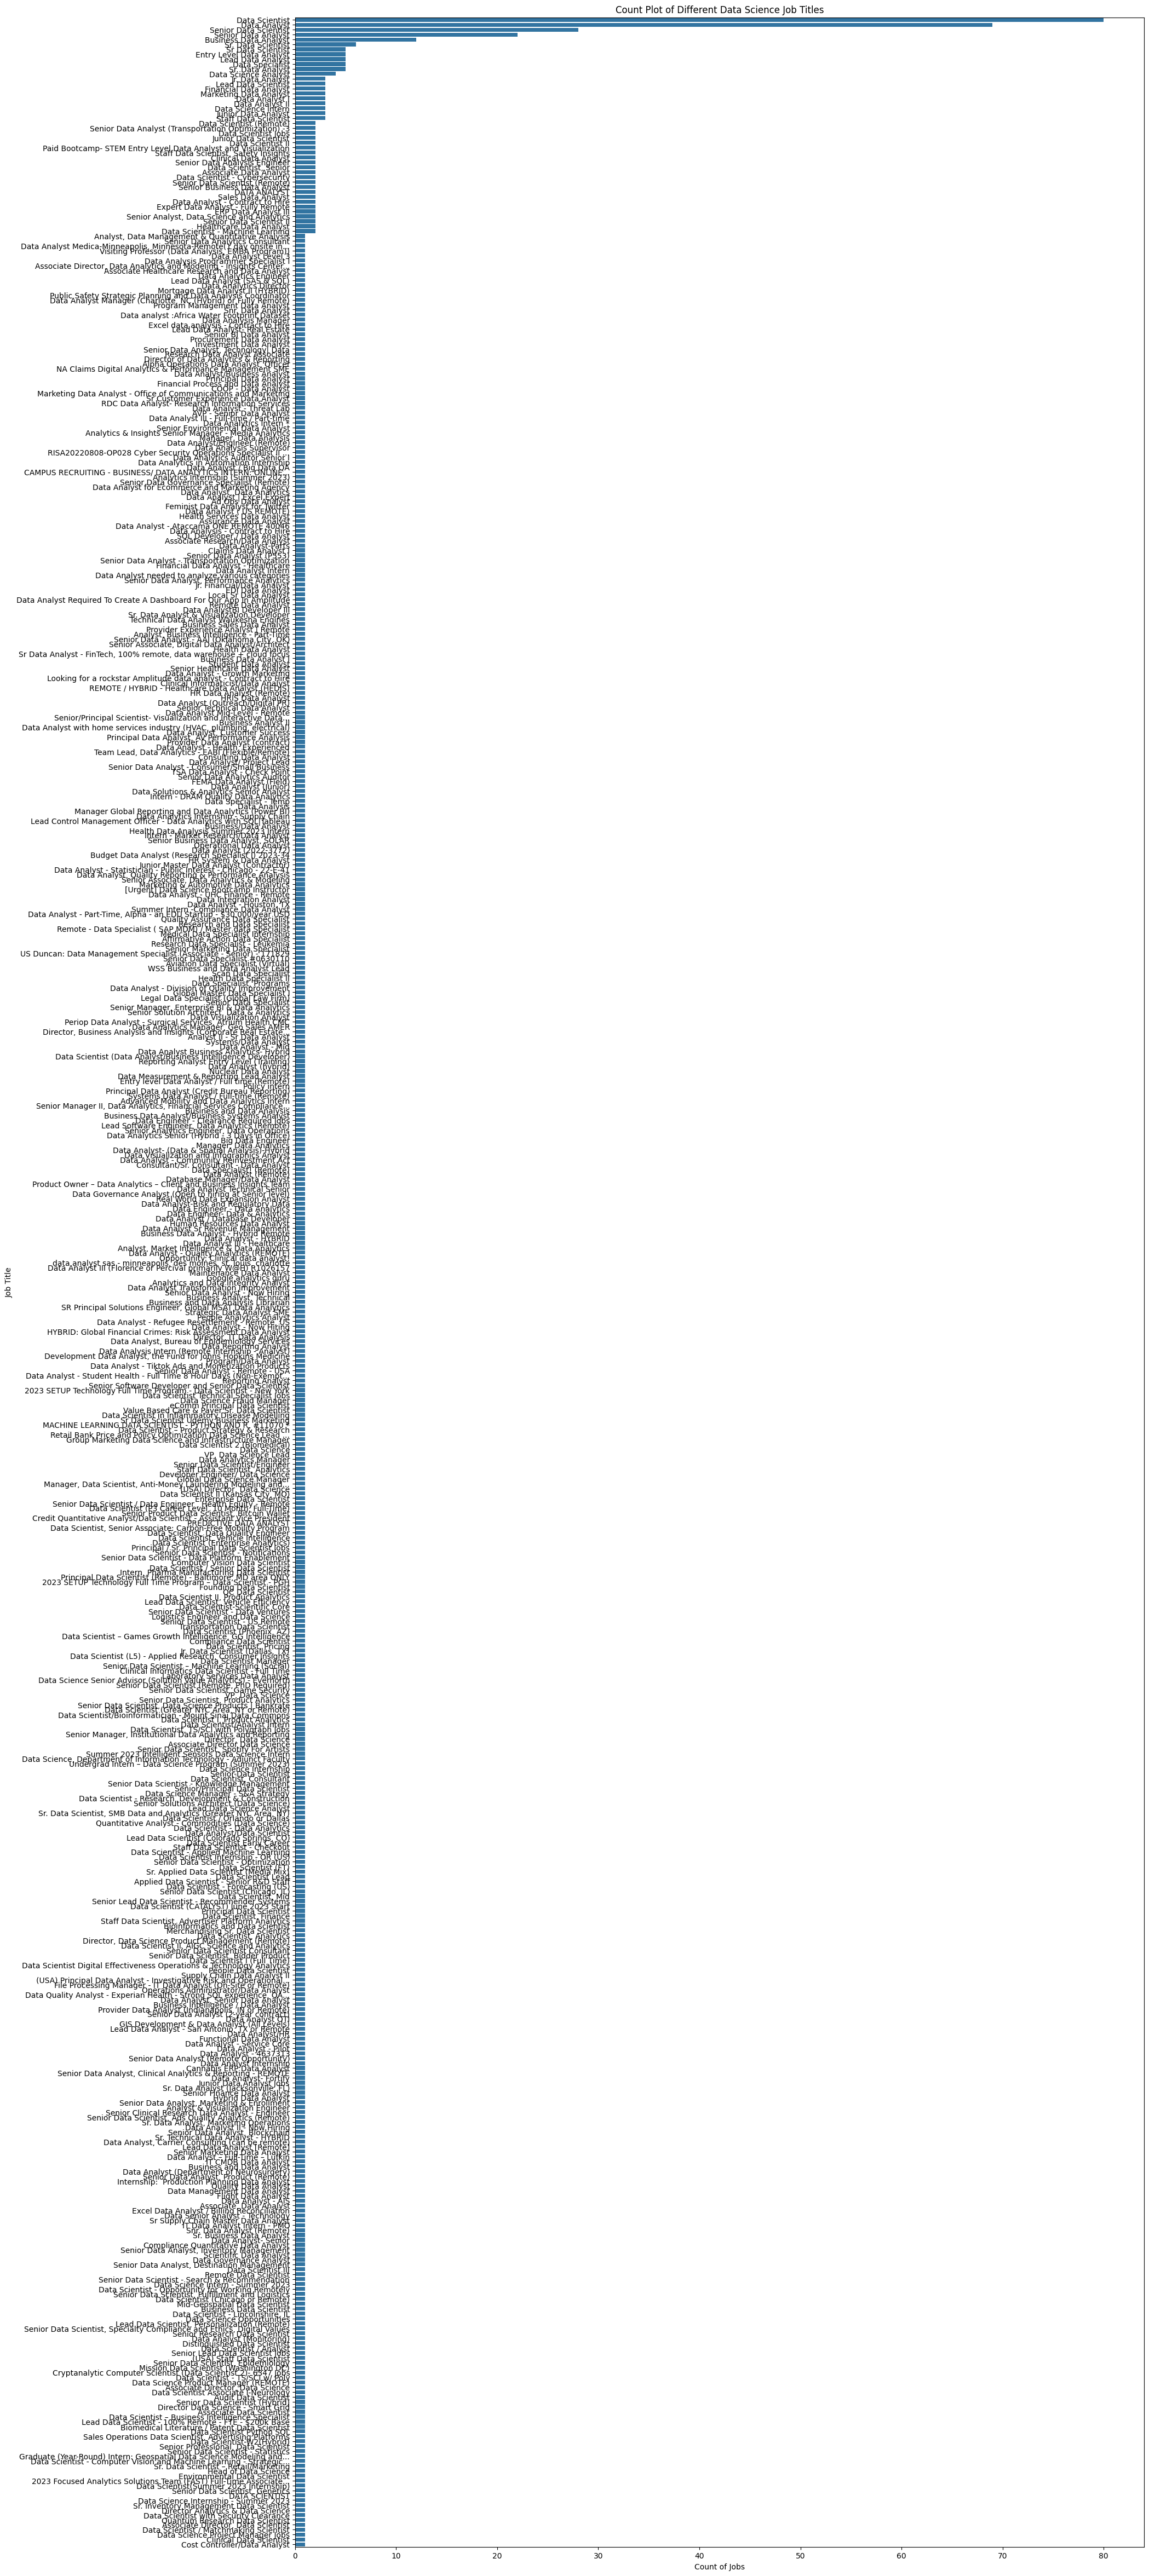

In [6]:
# Set the size of the figure
plt.figure(figsize=(20, 60))

# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count of Jobs')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

To gain meaningful insights into the data science job market, we need to examine the various naming conventions used for data science roles in our dataset. A countplot of job titles alone may not be very informative due to the wide variety of job titles and their specific wording. Instead, by focusing on the different naming conventions, we can better understand how data science positions are labeled across different job postings.

In [7]:
list_of_titles = df['title'].unique()
print('There are {} unique job titles for the Data Scientist postings'.format(len(list_of_titles)))

There are 515 unique job titles for the Data Scientist postings


We will create a countplot to visualize the distribution of different job boards used in our dataset. This plot will provide a clear picture of the frequency of job postings on each board, helping us understand which job boards are most commonly utilized.

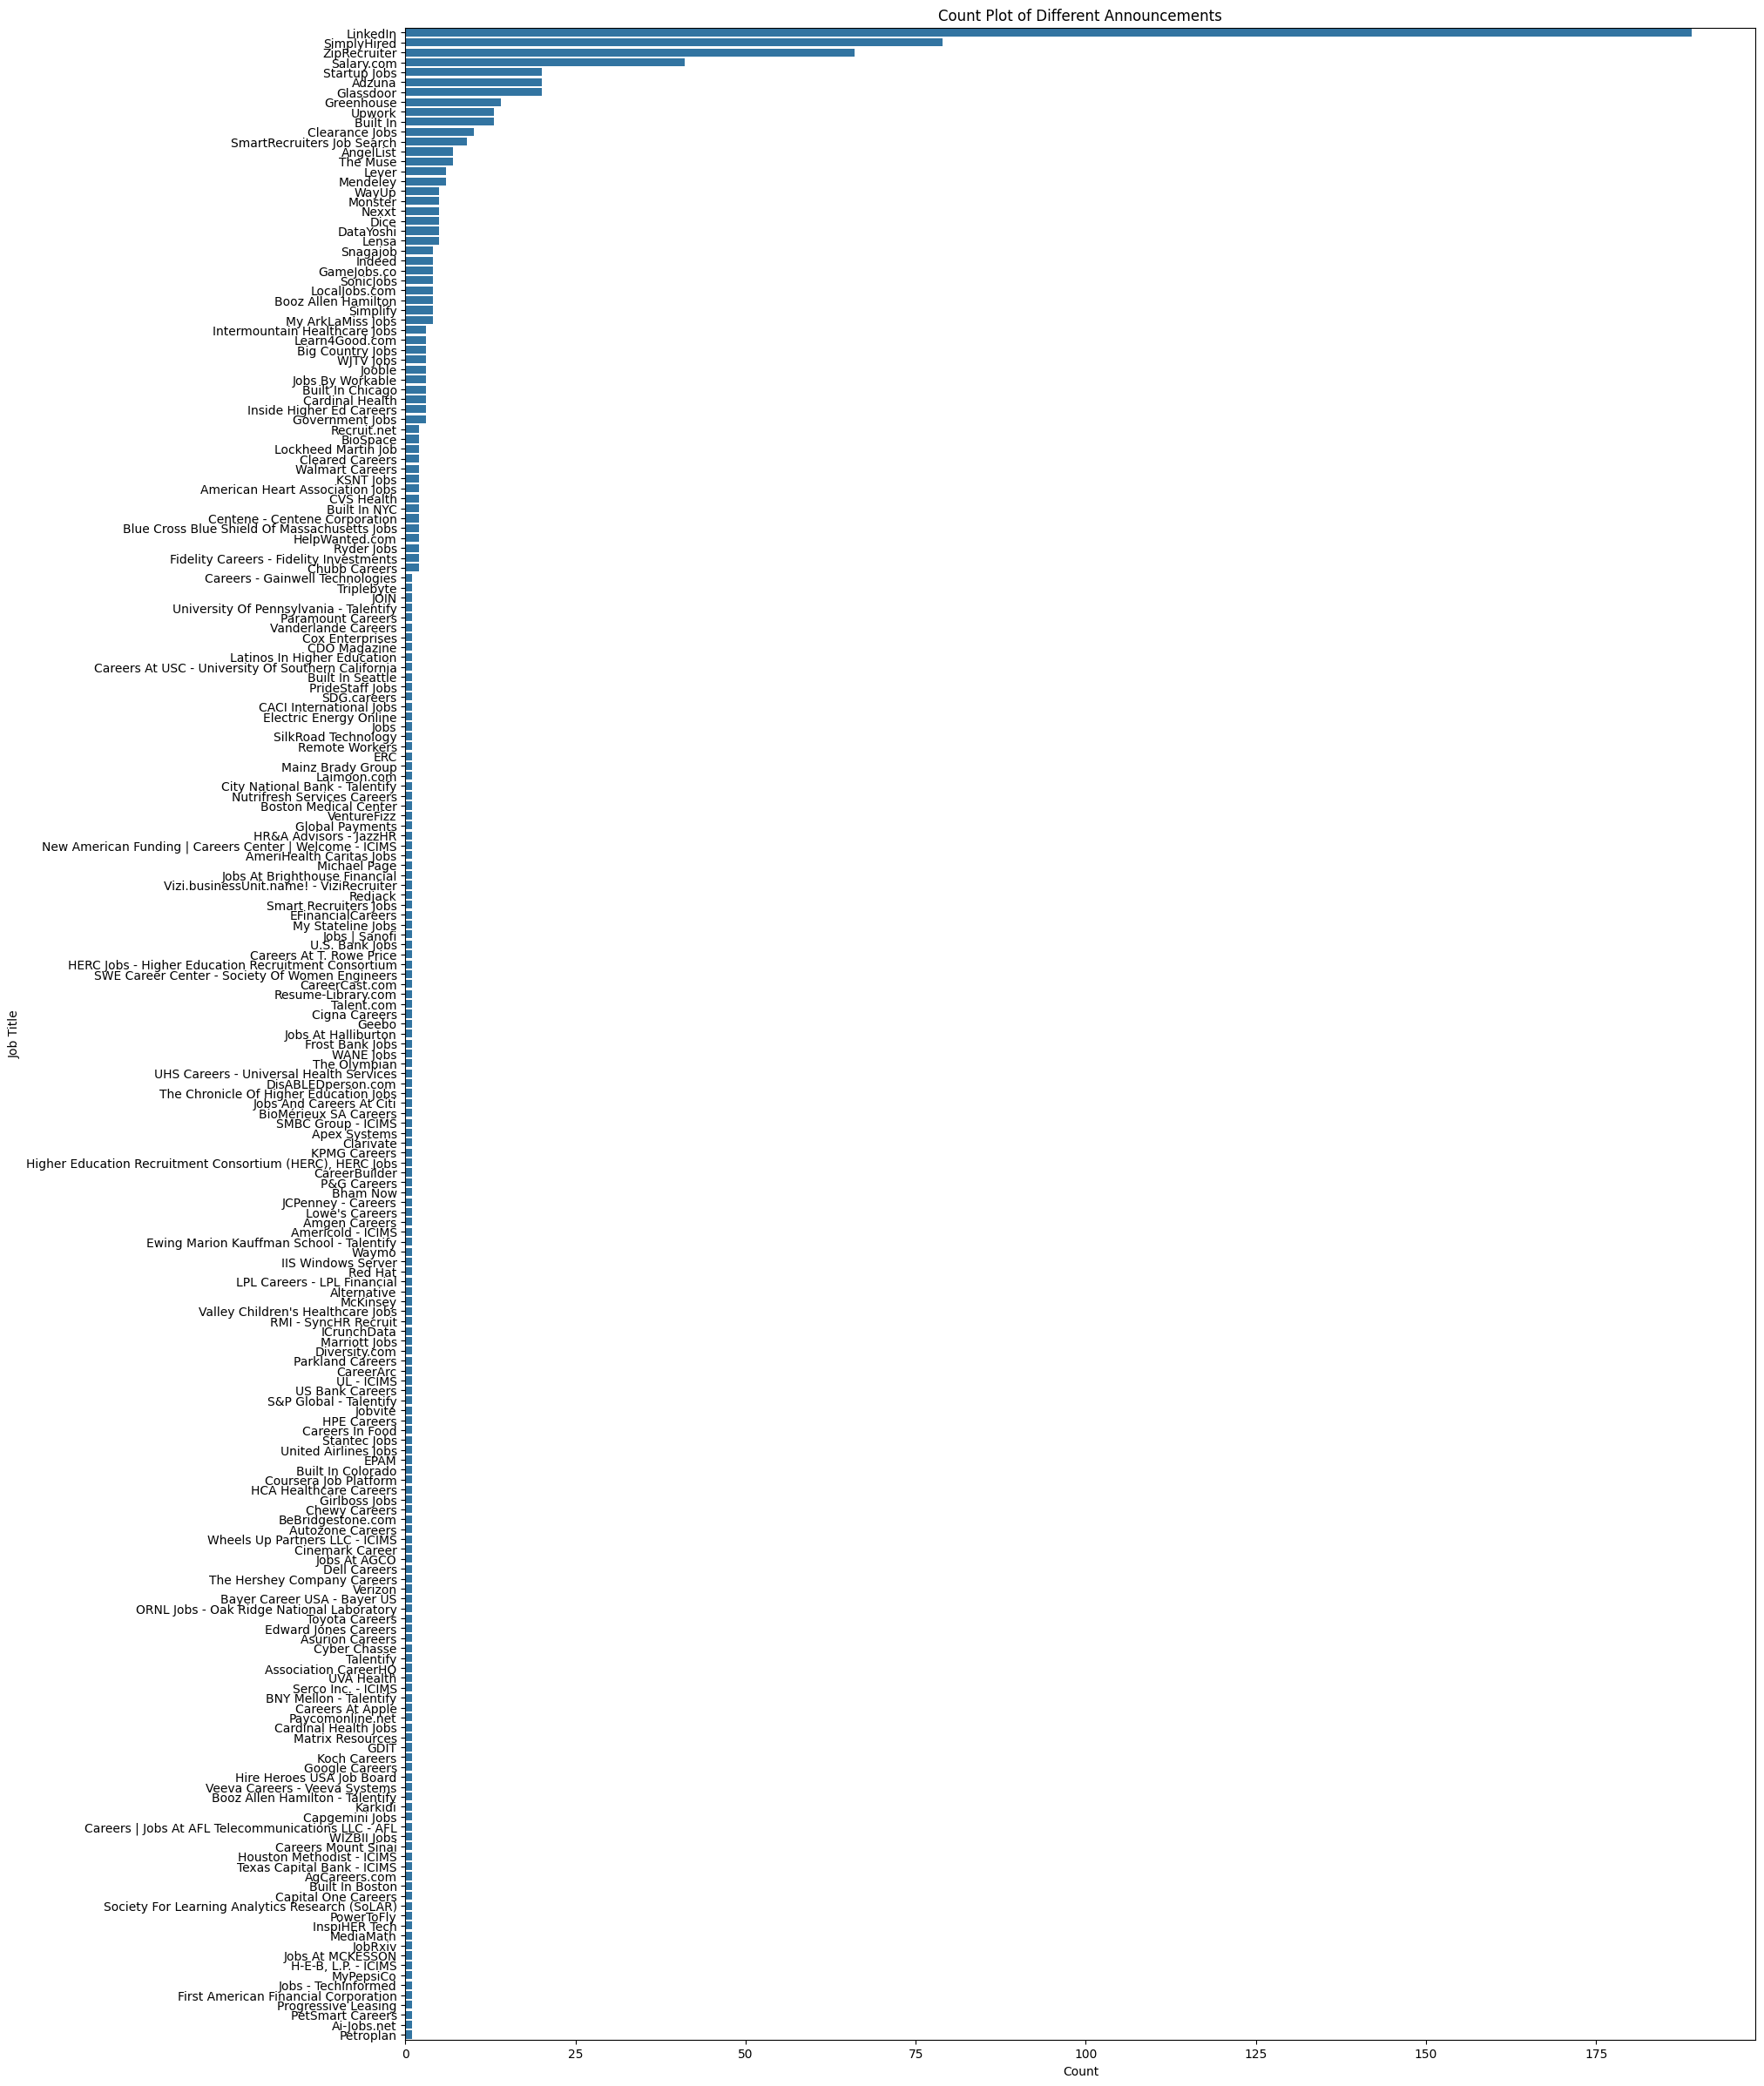

In [8]:
# Set the size of the figure
plt.figure(figsize=(20, 30))

# Plot histogram of the different announcements in the dataset
sns.countplot(y= 'announcement', data = df, order = df['announcement'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Announcements')

plt.show()

This countplot is pretty useless as we can't make much of it.

In [9]:
list_of_jobboards = df['announcement'].unique()
print('There are {} unique job boards used for Data Scientist postings'.format(len(list_of_jobboards)))

There are 203 unique job boards used for Data Scientist postings


# Data Cleaning

**Remove Duplicates**

Since the same job can appear on multiple job boards, we will remove duplicates based on the job description. If two postings have identical descriptions, we will consider them duplicates and keep only one.

In [10]:
# check for duplicates
duplicates = df['description'].duplicated()
df[duplicates]

,Unnamed: 0,title,company,announcement,description


**Cleaning Job Titles**

In [11]:
df['title'].unique()

array(['Senior Analyst, Data Science and Analytics',
       'Senior Data Scientist', 'Lead Data Science Analyst',
       'Data Science Intern', 'Data Scientist',
       'Senior Solutions Architect (Data Science)',
       'Data Scientist - Research, Development & Construction',
       'Data Science Manager - S&A Strategy',
       'Senior/Principal Data Scientist', 'Data Science Analyst',
       'Senior Data Scientist - Knowledge Management',
       'Data Scientist, Consultant', 'Senior-Data Scientist',
       'Staff Data Scientist', 'Data Science Internship',
       'Undergrad Intern – Data Science Program (Summer 2023)',
       'Data Science, Department of Information Technology - Adjunct Faculty',
       'Summer 2023 Intelligent Sensors Data Science Intern',
       'Associate Director Data Science',
       'Data Science Senior Advisor (Solution Value Analytics) - Evernorth',
       'Director, Data Science',
       'Senior Manager, Institutional Data Analytics and Reporting',
       'D

Given the 515 different job titles in our dataset, many titles are similar but written differently. Additionally, there are numerous non-data science roles, such as Analysts and Managers. To better visualize the distribution of data science jobs, we can write a function to clean up the title column.

First, we will filter out the job titles that do not contain "Data Scientist" or "data science". This will allow us to focus solely on data science roles, providing a clearer picture of the job market for these specific positions.

In [12]:
df['title'] = df['title'].str.lower()

part1 = df['title'].str.contains('data science')
part2 = df['title'].str.contains('data scientist')

part = part1 | part2
df = df[part]

In [13]:
df['title'].unique()

array(['senior analyst, data science and analytics',
       'senior data scientist', 'lead data science analyst',
       'data science intern', 'data scientist',
       'senior solutions architect (data science)',
       'data scientist - research, development & construction',
       'data science manager - s&a strategy',
       'senior/principal data scientist', 'data science analyst',
       'senior data scientist - knowledge management',
       'data scientist, consultant', 'senior-data scientist',
       'staff data scientist', 'data science internship',
       'undergrad intern – data science program (summer 2023)',
       'data science, department of information technology - adjunct faculty',
       'summer 2023 intelligent sensors data science intern',
       'associate director data science',
       'data science senior advisor (solution value analytics) - evernorth',
       'director, data science',
       'data scientist, ts/sci with polygraph jobs',
       'data scientist/an

In [14]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 191 unique job titles for Data Scientist postings


After filtering out job titles that include the substrings 'data science' or 'data scientist', we have reduced the number of unique job titles to 191. To further analyze and categorize these data science job postings, we will write a function to group them into specific roles based on common job title patterns.

**Categorizing Data Science Job Postings** <br>
To categorize the job postings effectively, we'll assign them to one of the following standardized roles<br>
*Lead Data Scientist <br>
*Senior Data Scientist <br>
*Data Science Manager <br>
*Intern Data Scientist <br>
*VP of Data Science <br>
*Director of Data Science <br>
*Staff Data Scientist <br>
*Junior Data Scientist <br>
*Data Scientist <br>

In [15]:
# A function that replaces the job title if it contains a certain sub string.
def replace_title(title):
    # Lowercase the titles first to keep consistency    
    if 'lead' in title or 'principal' in title or 'founding' in title:
        return 'Lead Data Scientist'
    elif 'senior' in title or 'sr' in title:
        return 'Senior Data Scientist'
    elif 'manager' in title:
        return 'Data Science Manager'
    elif 'intern' in title:
        return 'Intern Data Scientist'
    elif 'vp' in title or 'vice president' in title:
        return 'VP of Data Science'
    elif 'director' in title:
        return 'Director of Data Science'
    elif 'staff' in title:
        return 'Staff Data Scientist'
    elif 'jr' in title or 'junior' in title:
        return 'Junior Data Scientist'
    elif 'data scientist' in title or 'data science' in title: 
        return 'Data Scientist'
    else:
        return title

# Apply function to title column
df['title'] = df['title'].apply(replace_title)

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\1651114231.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(replace_title)


In [16]:
df['title'].unique()

array(['Senior Data Scientist', 'Lead Data Scientist',
       'Intern Data Scientist', 'Data Scientist', 'Data Science Manager',
       'Staff Data Scientist', 'Director of Data Science',
       'VP of Data Science', 'Junior Data Scientist'], dtype=object)

In [17]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 9 unique job titles for Data Scientist postings


We will create a countplot to visualize the distribution of the different Data Science job titles used in our dataset. This plot will provide us with a clear picture of the frequency of each job title.

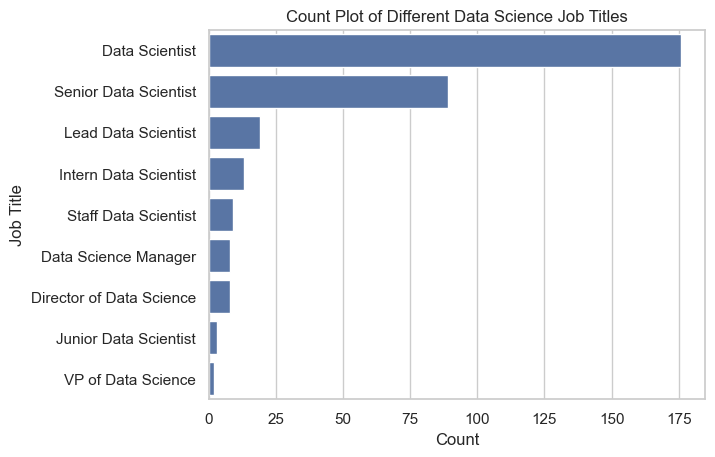

In [20]:
#Plot histogram of the different job titles in the dataset
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

#Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

The job title that appears most frequently in our dataset is "Data Scientist." However, it's important to recognize that this title does not necessarily indicate the seniority level of the position. It could encompass roles at various levels, such as Senior, Staff, Junior, or Intern positions. The specific level might be detailed in the job description rather than in the job title itself.

# Text Analysis

We will have a look at the job description

In [21]:
df['description']

0      TransUnion's Job Applicant Privacy Notice  Wha...
1      About The Opportunity  We're all about connect...
2      Discover. A brighter future.  With us, you’ll ...
3      Are you a 2023 college graduate or rising coll...
4      JOB DESCRIPTION:  At NORC, Data Scientists pla...
                             ...                        
326    Dice is the leading career destination for tec...
584    Secure our Nation, Ignite your Future  Join th...
694    Company Overview:  Join the world’s only threa...
698    An exciting career awaits you  At MPC, we're c...
700    We are looking for a expert level and experien...
Name: description, Length: 327, dtype: object

In [22]:
# Visualize the distribution of words use in job descriptions

# Create a new column called word count
df['word_count'] = df['description'].str.split().str.len()

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\587448582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['description'].str.split().str.len()


In [23]:
summary = df['word_count'].describe(percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count     327.000000
mean      668.584098
std       287.396113
min        37.000000
10%       301.000000
20%       408.200000
30%       491.000000
40%       583.400000
50%       660.000000
60%       761.600000
70%       828.000000
80%       904.600000
90%      1026.800000
100%     1481.000000
max      1481.000000
Name: word_count, dtype: float64

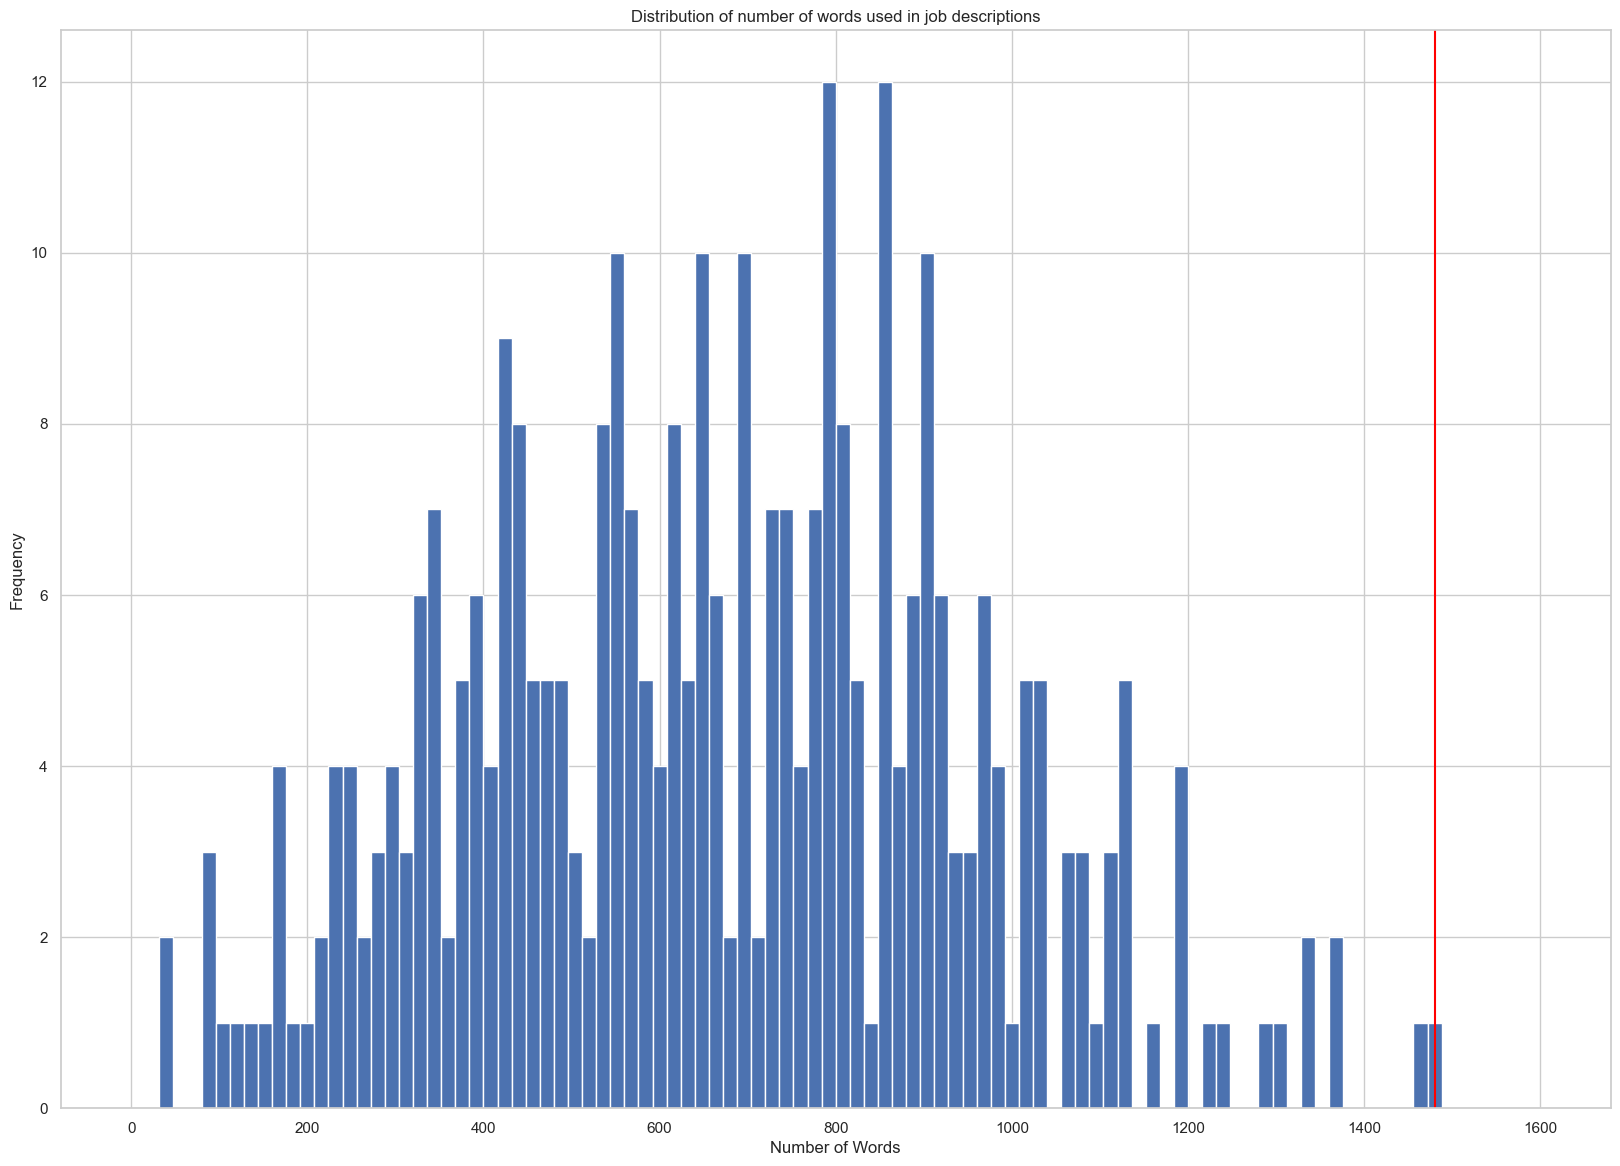

In [24]:
# Set the size of the figure
plt.figure(figsize=(20, 14))

# Plot the distribution of the word numbers per description
df['word_count'].plot.hist(xticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600], bins = 100, range = [0, 1600]).axvline(x= summary['100%'], c = 'red')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of number of words used in job descriptions')
plt.show()

Analyzing the number of words in the job descriptions reveals a normal distribution pattern. This suggests that most job descriptions have a similar word count, indicating they are generally of standard length—neither too lengthy nor too brief.

# Extract Skills and Tools From Job Descriptions

**Phrase Matching with Fuzzy**

In [26]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz

# list of skills to match
tools = ["Python","R","SQL","Jupyter","NumPy","Pandas","Matplotlib","Seaborn",
                      "SciPy","Scikit-Learn","TensorFlow","PyTorch","Keras","XGBoost","LightGBM",
                      "Plotly","Dask","Spark","Hadoop","AWS","Google Cloud",
                      "Azure","IBM Watson","NLTK","OpenCV","Gensim","StatsModels",
                      "Theano","Caffe","Keras-Tuner","Auto-Keras","Auto-Sklearn","Shap","ELI5","Bokeh",
                      "Folium","ggplot","plotnine","Geopandas","Datashader","Yellowbrick","H2O.ai","Flask",
                      "Dash","Streamlit","FastAPI","PySpark","TensorBoard","cuDF","NetworkX","BeautifulSoup",
                      "Scrapy","Numba","Cython", "Apache", "Git"]

def match_phrases(description, phrases):
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    # Only return matches once
    unique_matches = list(set(matched_phrase))
    return unique_matches

df['Tools'] = df['description'].apply(lambda x: match_phrases(x, tools))


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\289114418.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tools'] = df['description'].apply(lambda x: match_phrases(x, tools))


Function that will help us visualize the results of our phrase matching

In [27]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization functions

# Function used to generate countplot
def generate_countplot(df, column, top_n=None):
    words = [word for row in df[column] for word in row]
    
    counter = collections.Counter(words)
    
    top_n_words = [word for word, count in counter.most_common(top_n)]
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x=words, order=top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Example usage
# generate_countplot(df, 'Tools', top_n=10)

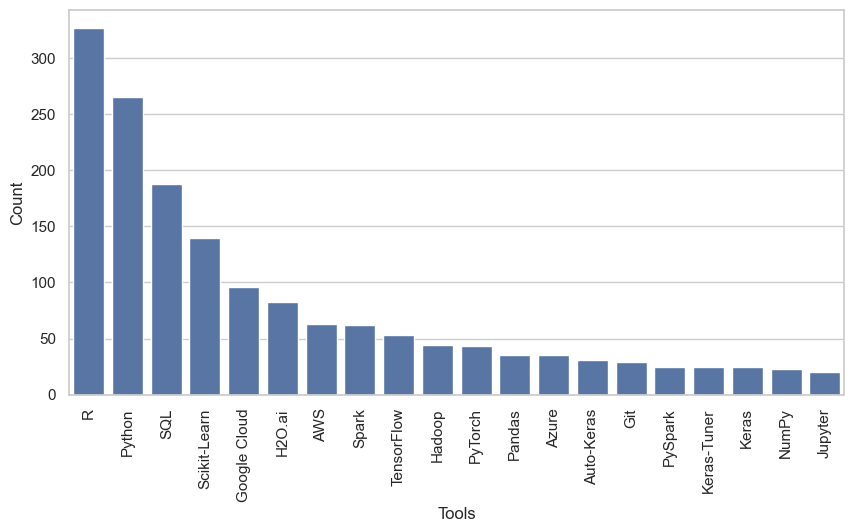

In [28]:
generate_countplot(df, 'Tools', 20)

As observed in the count plot, the most frequently requested tool in data science job postings is R, followed closely by Python.

**Tasks**

In [29]:
tasks = ["Python programming", "Statistics" ,"Probability", "Machine learning","Data visualization","preprocessing" "cleaning","database management", "analysis", "modeling",    
         "Deep learning","Data engineering", "visualization", "manipulation", "Machine learning", "storage", "Cloud computing", "ETL",    
         "warehousing","governance", "security","storytelling", "product development", "Natural language processing", "NLP",    
         "Computer vision", "Business intelligence", "mining","feature engineering", "Time series analysis", "Regression analysis", "Classification algorithms",    
         "Clustering algorithms", "Neural networks", "Decision trees", "random forests", "Support vector machines", "SVM", "K-nearest neighbors", "KNN", "Reinforcement learning","Hyperparameter tuning",    
         "Ensemble learning", "Transfer learning", "Unsupervised learning","Supervised learning","Exploratory data analysis", "EDA", "quality control",    
         "Data interpretation", "Collaboration", "communication", "Project management", "Agile development", "Software engineering", "Version control", "Debugging", "troubleshooting",
         "Continuous integration and deployment (CI/CD)", "optimization", 'deployment']


df['Skills'] = df['description'].apply(lambda x: match_phrases(x, tasks))

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\3801959385.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skills'] = df['description'].apply(lambda x: match_phrases(x, tasks))


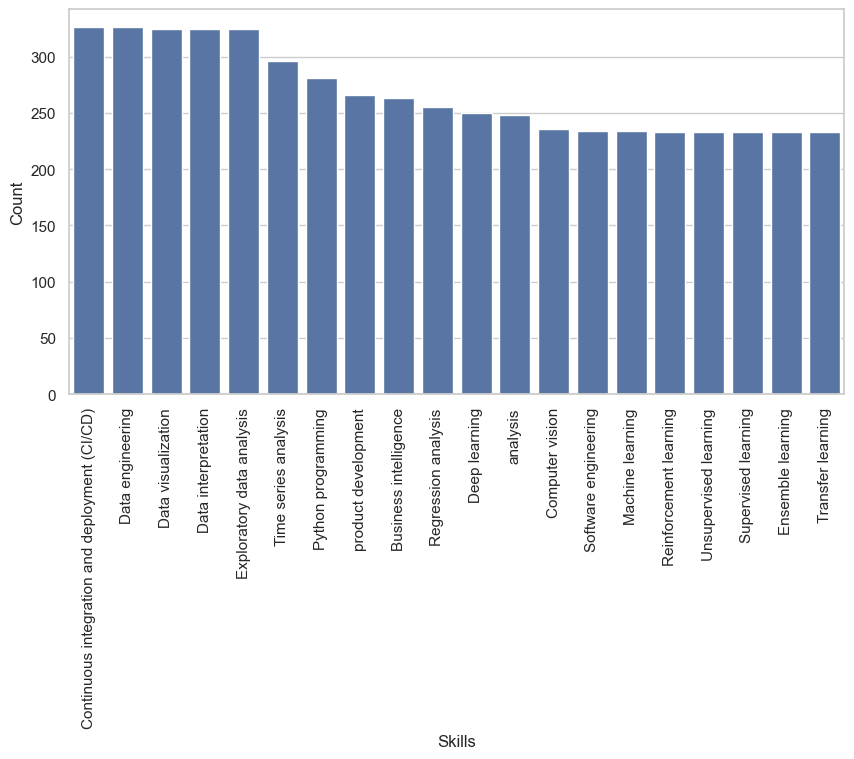

In [30]:
generate_countplot(df, 'Skills', 20)

We can see from the this countplot that the most common skill asked for in data science job postings is CI/CD followed by Data Engineering.

**Years of Experience Needed**

We will utilize regular expressions to extract the years of experience specified in job postings by matching common patterns in the text. By defining a regex pattern that captures the typical phrasing used to indicate years of experience, we can accurately extract this information.

In [31]:
import re 
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+\+?\s*years?\s*of\s*experience)', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\2574521732.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)


In [32]:
df['Years_of_Experience'].value_counts()

Years_of_Experience
Not Specified              244
2+ years of experience      14
5+ years of experience      14
3+ years of experience       8
3 years of experience        8
4+ years of experience       6
10 years of experience       4
2 years of experience        4
7 years of experience        4
7+ years of experience       3
5 years of experience        3
4 years of experience        3
6+ years of experience       3
10+ years of experience      2
8+ years of experience       2
5  years of experience       1
6 years of experience        1
12 years of experience       1
1 year of experience         1
8 years of experience        1
Name: count, dtype: int64

There are many job postings where the years of experience are not specified. This is likely because the experience requirements are phrased differently and do not match the regex pattern we used.

We will change the regex pattern to see if we can find more

In [33]:
import re 
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+)\s*years?', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\2056042938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)


In [34]:
df['Years_of_Experience'].value_counts()

Years_of_Experience
Not Specified    212
3 years           22
5 years           18
2 years           12
7 years           12
6 years           10
10 years           8
8 years            6
4 years            5
18 years           4
1 year             4
12 years           2
125 years          2
237 years          2
5  years           1
25 years           1
30 years           1
2 Years            1
9 years            1
50 years           1
55 years           1
60 years           1
Name: count, dtype: int64

We've successfully reduced the number of "Not Specified" entries by 32. However, we still encounter some invalid values like 125, 237, 25, 30, 50, 55, 60, and 18 years. The 18 years value likely refers to the minimum age requirement rather than years of experience. We'll remove these invalid entries and reclassify them as "Not Specified."

In [35]:
# Extract just the numbers using regular expression
df['years'] = df['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\2648555431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years'] = df['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)


In [36]:
df['years'].value_counts()

years
0      212
3       22
5       19
2       13
7       12
6       10
10       8
8        6
4        5
18       4
1        4
12       2
125      2
237      2
25       1
30       1
9        1
50       1
55       1
60       1
Name: count, dtype: int64

In [37]:
df['experience'] = df['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 18
                                    else ('1 to 3 years' if x >= 1 and x <= 3
                                    else ('4 to 6 years' if x >= 4 and x <= 6 
                                    else '6+ years')))

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\2337572541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'] = df['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 18


In [38]:
df['experience'].value_counts()

experience
Not Specified    225
1 to 3 years      39
4 to 6 years      34
6+ years          29
Name: count, dtype: int64

<Axes: xlabel='experience', ylabel='count'>

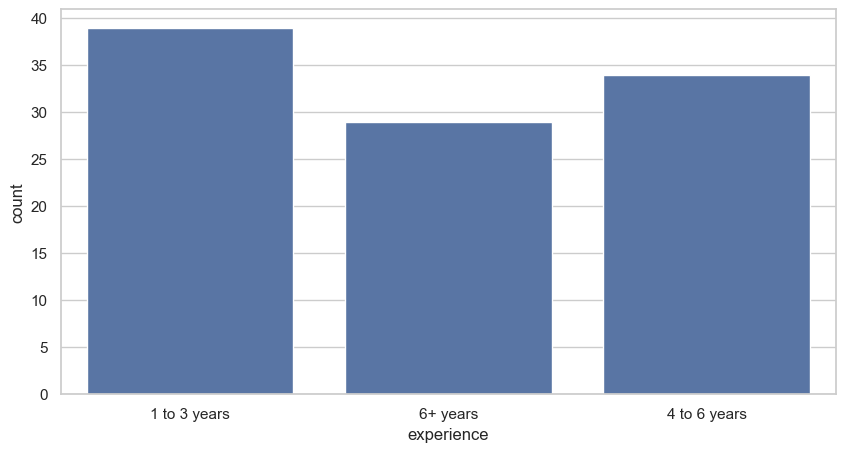

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'experience', data = df[df['experience'] != 'Not Specified'])

Among the job postings that specify years of experience, most request 1 to 3 years. We can further analyze this data to determine if the required years of experience vary by data science job titles.

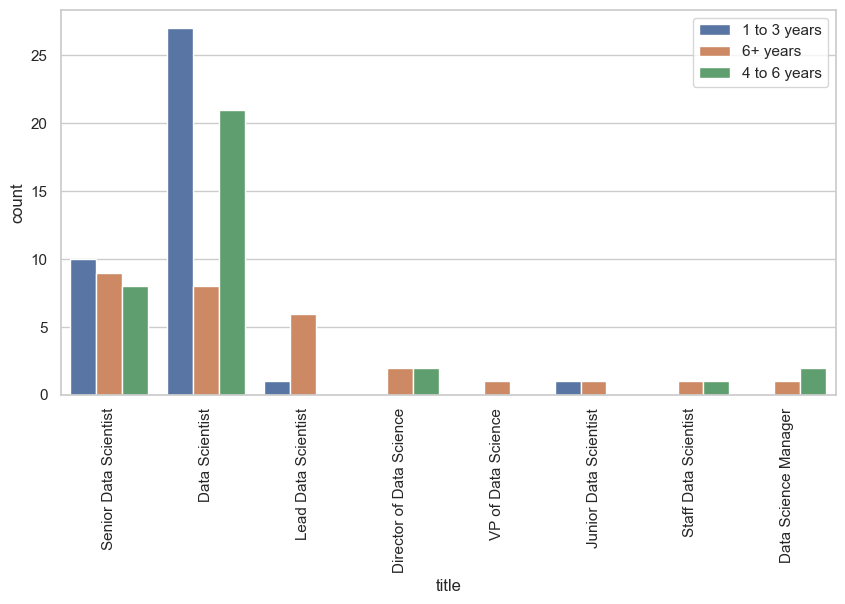

In [40]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['experience'] != 'Not Specified'], x = 'title', hue = 'experience')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

We observe that the required years of experience vary by job title. Senior-level data science positions, such as Senior Data Scientist, Lead Data Scientist, Director of Data Science, VP of Data Science, Staff Data Scientist, and Data Science Manager, predominantly request 4 to 6 years of experience or more than 6 years of experience.

# Extract Education Level

We will be using Fuzzy matching to extract the education level listed in job descriptions

In [41]:
import re 
import fuzzywuzzy
from fuzzywuzzy import fuzz

def extract_education_level(description):
    # Dictionary that maps education levels to their abbreviations
    education_levels = {
        'bachelor': ['bs', 'bachelor'],
        'master': ['ms', 'master'],
        'phd': ['phd'],
        'doctorate': ['doctorate']
    }
    # initialize the education level and maximum ratio to 0
    education_level = None
    max_ratio = 0
    # iterate over the education levels and their abbreviations
    for level, abbreviations in education_levels.items():
        level_variants = [level] + abbreviations
        for variant in level_variants:
            # calculate the fuzzy matching ratio between the variant and the job description
            ratio = fuzz.partial_token_set_ratio(variant, description)
            if ratio > max_ratio:
                max_ratio = ratio
                education_level = level
    if max_ratio>= 80:
        return education_level
    else:
        return 'Not Specified'
    
df['Education_Level'] = df['description'].apply(extract_education_level)

C:\Users\shrad\AppData\Local\Temp\ipykernel_5240\2114998899.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Level'] = df['description'].apply(extract_education_level)


<Axes: xlabel='Education_Level', ylabel='count'>

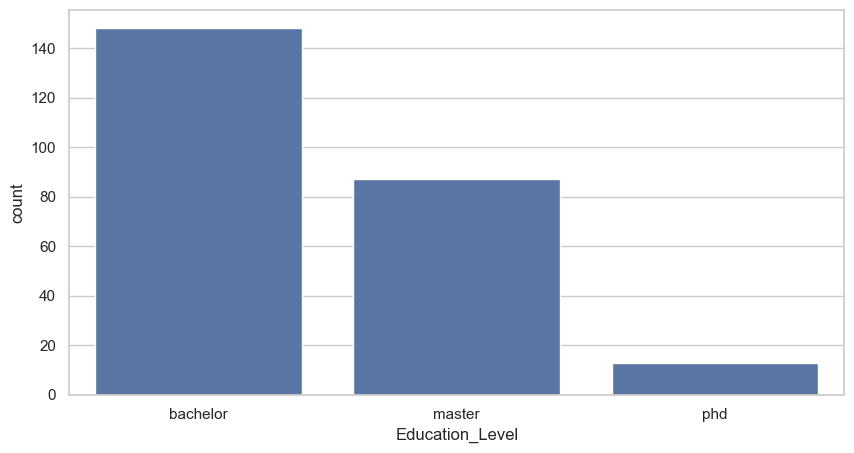

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education_Level', data = df[df['Education_Level'] != 'Not Specified'])

As can be seen from the above statistic, most job postings that do ask about education requirements ask for a bachelor's degree, but some also require a master's or a doctorate.<br>

Let's gather more information and investigate whether the degree of education affects the level of employment in data science.

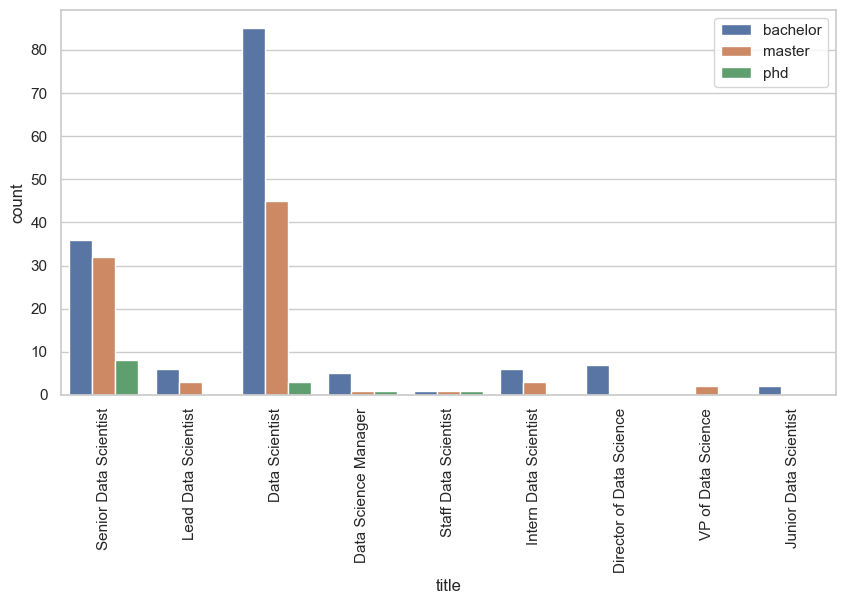

In [43]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['Education_Level'] != 'Not Specified'], x = 'title', hue = 'Education_Level')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

The figure indicates that the education level required increases for the more senior-level positions (Senior Data Scientist, Staff Data Scientist, VP of Data Science).

# Conclusion

In conclusion, we can learn a great deal about the status of the industry now and the qualifications that employers are most interested in hiring for positions in data science by looking through job listings from 2023. This information can assist you in making well-informed decisions regarding your future in the field of data science, whether you are an employer or a job seeker.